In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from scipy import stats
from pandas.plotting import scatter_matrix

In [37]:
df = pd.read_csv("data/games-features.csv")
df.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [38]:
print(df.shape)
print(df.size)

(13357, 78)
1041846


In [39]:
df.dtypes

QueryID                          int64
ResponseID                       int64
QueryName                       object
ResponseName                    object
ReleaseDate                     object
RequiredAge                      int64
DemoCount                        int64
DeveloperCount                   int64
DLCCount                         int64
Metacritic                       int64
MovieCount                       int64
PackageCount                     int64
RecommendationCount              int64
PublisherCount                   int64
ScreenshotCount                  int64
SteamSpyOwners                   int64
SteamSpyOwnersVariance           int64
SteamSpyPlayersEstimate          int64
SteamSpyPlayersVariance          int64
AchievementCount                 int64
AchievementHighlightedCount      int64
ControllerSupport                 bool
IsFree                            bool
FreeVerAvail                      bool
PurchaseAvail                     bool
SubscriptionAvail        

In [40]:
np.sum(df.isnull())

QueryID                        0
ResponseID                     0
QueryName                      1
ResponseName                   0
ReleaseDate                    0
RequiredAge                    0
DemoCount                      0
DeveloperCount                 0
DLCCount                       0
Metacritic                     0
MovieCount                     0
PackageCount                   0
RecommendationCount            0
PublisherCount                 0
ScreenshotCount                0
SteamSpyOwners                 0
SteamSpyOwnersVariance         0
SteamSpyPlayersEstimate        0
SteamSpyPlayersVariance        0
AchievementCount               0
AchievementHighlightedCount    0
ControllerSupport              0
IsFree                         0
FreeVerAvail                   0
PurchaseAvail                  0
SubscriptionAvail              0
PlatformWindows                0
PlatformLinux                  0
PlatformMac                    0
PCReqsHaveMin                  0
          

In [41]:
len(df[df.duplicated()==True])

df[df.duplicated()==True].head(53)



,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
8,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,,,,
26,620,620,Portal 2,Portal 2,Apr 18 2011,0,0,1,1,95,...,,,English* French* German* Spanish* Czech Danish...,http://www.thinkwithportals.com/,Minimum:OS: Windows 7 / Vista / XPProcessor: 3...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: MAC OS X 10.6.7 or higherProcessor...,
32,1300,1300,SiN Episodes: Emergence,SiN Episodes: Emergence,May 10 2006,0,0,1,0,75,...,,,English Russian French,None,Minimum: 1.2 GHz Processor 256MB RAM DirectX 7...,,,,,
33,1300,1300,SiN Episodes: Emergence,SiN Episodes: Emergence,May 10 2006,0,0,1,0,75,...,,,English Russian French,None,Minimum: 1.2 GHz Processor 256MB RAM DirectX 7...,,,,,
50,2100,2100,Dark Messiah of Might & Magic Single Player,Dark Messiah of Might & Magic,Oct 25 2006,17,1,1,0,72,...,,,English French German Italian Spanish,http://www.darkmessiahmightandmagic.com,Minimum: AMD Athlon™ Pentium® 2.4 GHz 512MB RA...,,,,,
70,2520,2520,Gumboy: Crazy Adventures,Gumboy - Crazy Adventures(tm),Dec 19 2006,0,1,1,0,69,...,,GameTunnel - 8/10 and 2006 Game of the YearOne...,English Polish Russian,http://www.gumboycrazyadventures.com/,Minimum: Windows 2000/XP SP2 1 GHz Processor 2...,,,,,
72,2540,2540,RIP,RIP - Trilogy(tm),Jun 1 2007,0,1,1,0,0,...,,GameTunnel gives RIP 3 a 73%The RIP series is ...,English,None,Minimum: Windows XP/2000 1 GHz Processor 256 M...,,,,,
73,2540,2540,RIP,RIP - Trilogy(tm),Jun 1 2007,0,1,1,0,0,...,,GameTunnel gives RIP 3 a 73%The RIP series is ...,English,None,Minimum: Windows XP/2000 1 GHz Processor 256 M...,,,,,
153,4230,4230,Race: The WTCC Game,RACE - The WTCC Game,Nov 24 2006,0,0,1,0,0,...,,,English French German Italian Spanish,http://www.race-game.org/,Minimum Microsoft Windows XP Home/Pro 1.7 GHz ...,,,,,
179,4920,4920,Natural Selection 2,Natural Selection 2,Oct 30 2012,0,0,1,5,80,...,,NS2 is a genius mash of Counter Strike and Sta...,English* French German Spanish Polish Russian ...,http://www.naturalselection2.com,Minimum:OS:Windows Vista 32-bitProcessor:Core ...,Recommended:OS:Windows 7 64-bit or newerProces...,,,,


In [42]:
df.loc[df['QueryID']==80]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
7,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,,,,
8,80,80,Counter-Strike: Condition Zero,Counter-Strike: Condition Zero,Mar 1 2004,0,0,1,0,65,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,,,,


In [43]:
df=df.drop_duplicates(keep='first')

In [44]:
np.sum(df.isnull())

QueryID                        0
ResponseID                     0
QueryName                      1
ResponseName                   0
ReleaseDate                    0
RequiredAge                    0
DemoCount                      0
DeveloperCount                 0
DLCCount                       0
Metacritic                     0
MovieCount                     0
PackageCount                   0
RecommendationCount            0
PublisherCount                 0
ScreenshotCount                0
SteamSpyOwners                 0
SteamSpyOwnersVariance         0
SteamSpyPlayersEstimate        0
SteamSpyPlayersVariance        0
AchievementCount               0
AchievementHighlightedCount    0
ControllerSupport              0
IsFree                         0
FreeVerAvail                   0
PurchaseAvail                  0
SubscriptionAvail              0
PlatformWindows                0
PlatformLinux                  0
PlatformMac                    0
PCReqsHaveMin                  0
          

In [45]:
df.loc[df.QueryName.isnull(), 'QueryName']=""
df.loc[df.SupportEmail.isnull(), 'SupportEmail']=""
df.loc[df.SupportURL.isnull(), 'SupportURL']=""
df.loc[df.LegalNotice.isnull(), 'LegalNotice']=""

In [46]:
# df.loc[df.ReleaseDate,'ReleaseDate']=pd.to_datetime(df.ReleaseDate)
# 


# def format_date(original):
#  newReleaseDate = original.replace(','," ")
#  return newReleaseDate
def format_date(original):
    year=[int(s) for s in original.split() if s.isdigit()]
    print(year)
    return year
def format_year(original):
    if(original==[]):
        return 0
    elif(len(original)==1):
        return original[0]
    elif(len(original)==2):
        return original[1]
df.ReleaseDate= df.ReleaseDate.map(format_date)
df.ReleaseDate= df.ReleaseDate.map(format_year)
df.ReleaseDate=df.ReleaseDate.astype('int')
df.ReleaseDate

[1, 2000]
[1, 1999]
[1, 2003]
[1, 2001]
[1, 1999]
[1, 2000]
[8, 1998]
[1, 2004]
[1, 2001]
[16, 2004]
[1, 2004]
[1, 2004]
[12, 2010]
[1, 2004]
[27, 2005]
[1, 2006]
[1, 2006]
[10, 2007]
[10, 2007]
[10, 2007]
[17, 2008]
[16, 2009]
[9, 2013]
[18, 2011]
[19, 2010]
[21, 2012]
[12, 2005]
[14, 2006]
[14, 2009]
[10, 2006]
[14, 2005]
[23, 2006]
[29, 2006]
[19, 2008]
[7, 2006]
[7, 2006]
[6, 2006]
[6, 2006]
[6, 2006]
[26, 2006]
[16, 2006]
[3, 2007]
[10, 2012]
[1, 2006]
[30, 2009]
[25, 2006]
[3, 2007]
[4, 2011]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[3, 2007]
[11, 2006]
[20, 2006]
[29, 2010]
[8, 2006]
[19, 2006]
[1, 2007]
[29, 2007]
[7, 2007]
[22, 2007]
[13, 2006]
[13, 2006]
[13, 2006]
[13, 2006]
[12, 2008]
[12, 2008]
[12, 2007]
[12, 2008]
[21, 2006]
[21, 2006]
[16, 2008]
[8, 2010]
[8, 2010]
[15, 2013]
[26, 2006]
[26, 2006]
[26, 2006]
[21, 2006]
[24, 2006]
[24, 2006]
[8, 2007]
[8, 2008]
[1, 2009]
[19, 2009]
[24, 2007]
[6, 2007]


[6, 2014]
[24, 2014]
[12, 2016]
[31, 2014]
[17, 2014]
[3, 2014]
[1, 2014]
[8, 2014]
[11, 2014]
[19, 2014]
[30, 2014]
[3, 2014]
[24, 2014]
[17, 2014]
[24, 2015]
[15, 2014]
[21, 2014]
[18, 2014]
[24, 2014]
[26, 2014]
[15, 2014]
[28, 2014]
[10, 2014]
[15, 2014]
[28, 2014]
[16, 2014]
[8, 2014]
[29, 2016]
[26, 2014]
[1, 2014]
[13, 2013]
[27, 2014]
[28, 2014]
[6, 2013]
[13, 2014]
[2016]
[26, 2013]
[5, 2014]
[9, 2015]
[25, 2014]
[9, 2014]
[9, 2014]
[13, 2014]
[13, 2015]
[25, 2014]
[1, 2014]
[29, 2015]
[28, 2014]
[17, 2014]
[19, 2014]
[1, 2014]
[25, 2014]
[19, 2015]
[28, 2014]
[17, 2014]
[19, 2014]
[1, 2014]
[6, 2014]
[27, 2014]
[4, 2014]
[21, 2014]
[25, 2014]
[11, 2014]
[10, 2015]
[28, 2014]
[13, 2014]
[26, 2014]
[21, 2014]
[28, 2014]
[19, 2015]
[7, 2014]
[26, 2014]
[16, 2014]
[12, 2015]
[3, 2014]
[23, 2014]
[22, 2014]
[9, 2014]
[17, 2015]
[8, 2014]
[8, 2014]
[3, 2013]
[26, 2014]
[28, 2013]
[17, 2014]
[11, 2014]
[6, 2013]
[1, 2014]
[7, 2014]
[29, 2014]
[19, 2013]
[19, 2013]
[10, 2014]
[15, 20

[20, 2015]
[27, 2015]
[7, 2015]
[29, 2015]
[15, 2015]
[8, 2015]
[3, 2015]
[19, 2015]
[19, 2015]
[18, 2015]
[16, 2015]
[27, 2015]
[6, 2015]
[13, 2015]
[1, 2015]
[25, 2015]
[2, 2015]
[1, 2015]
[11, 2016]
[19, 2015]
[2, 2015]
[28, 2015]
[3, 2015]
[17, 2015]
[27, 2015]
[30, 2016]
[24, 2015]
[10, 2015]
[17, 2015]
[25, 2015]
[25, 2015]
[26, 2015]
[28, 2015]
[28, 2015]
[28, 2015]
[29, 2015]
[10, 2015]
[27, 2015]
[28, 2015]
[11, 2015]
[3, 2015]
[24, 2016]
[19, 2015]
[6, 2015]
[29, 2015]
[22, 2016]
[24, 2015]
[22, 2015]
[27, 2015]
[11, 2015]
[27, 2016]
[12, 2015]
[18, 2015]
[26, 2015]
[23, 2015]
[23, 2015]
[22, 2015]
[23, 2015]
[31, 2016]
[28, 2015]
[31, 2015]
[24, 2015]
[2, 2015]
[17, 2015]
[2, 2015]
[20, 2015]
[12, 2015]
[26, 2015]
[26, 2015]
[6, 2015]
[16, 2015]
[4, 2015]
[2, 2015]
[21, 2016]
[3, 2015]
[26, 2015]
[31, 2015]
[28, 2015]
[20, 2016]
[20, 2015]
[2, 2015]
[30, 2015]
[24, 2015]
[12, 2015]
[27, 2015]
[21, 2015]
[13, 2015]
[28, 2015]
[12, 2015]
[5, 2015]
[20, 2015]
[4, 2016]
[9, 2015

[15, 2016]
[2, 2015]
[24, 2015]
[1, 2016]
[20, 2015]
[10, 2015]
[19, 2017]
[2016]
[5, 2016]
[28, 2016]
[1, 2016]
[6, 2016]
[16, 2015]
[24, 2016]
[7, 2016]
[18, 2015]
[2, 2015]
[10, 2016]
[1, 2016]
[1, 2015]
[20, 2015]
[4, 2016]
[21, 2015]
[14, 2016]
[14, 2016]
[11, 2015]
[29, 2016]
[1, 2015]
[14, 2015]
[10, 2015]
[5, 2016]
[6, 2016]
[3, 2016]
[2, 2015]
[21, 2016]
[13, 2016]
[9, 2015]
[9, 2015]
[4, 2015]
[2, 2015]
[19, 2016]
[14, 2015]
[3, 2016]
[27, 2016]
[2016]
[6, 2015]
[20, 2016]
[20, 2016]
[5, 2016]
[29, 2016]
[6, 2016]
[18, 2016]
[31, 2016]
[4, 2015]
[5, 2016]
[1, 2016]
[5, 2016]
[15, 2016]
[4, 2015]
[11, 2015]
[17, 2016]
[21, 2016]
[7, 2016]
[8, 2016]
[1, 2015]
[1, 2016]
[31, 2016]
[16, 2016]
[26, 2016]
[22, 2016]
[2, 2016]
[30, 2016]
[3, 2015]
[25, 2016]
[2, 2015]
[4, 2015]
[28, 2016]
[8, 2016]
[15, 2016]
[22, 2015]
[30, 2015]
[21, 2016]
[4, 2016]
[21, 2016]
[15, 2015]
[20, 2016]
[21, 2016]
[]
[29, 2016]
[10, 2015]
[7, 2015]
[18, 2015]
[8, 2015]
[29, 2016]
[29, 2016]
[27, 2016]


[26, 2016]
[2, 2016]
[9, 2016]
[3, 2016]
[17, 2016]
[24, 2016]
[9, 2016]
[18, 2016]
[1, 2016]
[18, 2016]
[15, 2016]
[18, 2016]
[18, 2016]
[18, 2016]
[29, 2016]
[16, 2016]
[18, 2016]
[18, 2016]
[2016]
[7, 2016]
[25, 2016]
[29, 2016]
[19, 2016]
[30, 2016]
[31, 2016]
[15, 2016]
[24, 2016]
[2016]
[17, 2016]
[20, 2016]
[2017]
[2, 2016]
[2, 2016]
[15, 2016]
[26, 2016]
[2016]
[17, 2016]
[19, 2016]
[6, 2016]
[25, 2016]
[2017]
[26, 2016]
[24, 2016]
[26, 2016]
[28, 2016]
[23, 2016]
[16, 2016]
[24, 2016]
[4, 2016]
[18, 2016]
[24, 2016]
[18, 2016]
[23, 2016]
[6, 2016]
[2016]
[8, 2016]
[2, 2016]
[23, 2016]
[25, 2016]
[8, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[26, 2016]
[2, 2016]
[3, 2016]
[2016]
[25, 2016]
[8, 2016]
[19, 2016]
[1, 2016]
[9, 2016]
[5, 2016]
[11, 2016]
[22, 2016]
[25, 2016]
[11, 2016]
[9, 2016]
[19, 2016]
[29, 2016]
[31, 2016]
[24, 2016]
[2, 2016]
[2, 2016]
[29, 2016]
[29, 2

0        2000
1        1999
2        2003
3        2001
4        1999
5        2000
6        1998
7        2004
9        2001
10       2004
11       2004
12       2004
13       2010
14       2004
15       2005
16       2006
17       2006
18       2007
19       2007
20       2007
21       2008
22       2009
23       2013
24       2011
25       2010
27       2012
28       2005
29       2006
30       2009
31       2006
         ... 
13327    2016
13328    2016
13329    2016
13330    2016
13331    2016
13332    2017
13333    2017
13334    2016
13335    2016
13336    2016
13337    2016
13338    2016
13339    2016
13340    2016
13341    2016
13342    2017
13343    2016
13344    2016
13345    2016
13346    2017
13347    2016
13348    2016
13349    2016
13350    2016
13351    2016
13352    2017
13353    2016
13354    2019
13355    2016
13356    2016
Name: ReleaseDate, Length: 13304, dtype: int32

In [47]:
df.loc[(df.PriceFinal>0) & (df.IsFree)]
df.loc[(df.PriceFinal>0) & (df.GenreIsFreeToPlay)]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
5430,345580,345580,Universal Combat CE 2.0,Universal Combat CE 2.0,2015,0,0,1,1,0,...,,,English**languages with full audio support,http://www.3000ad.com/games/universal-combat-c...,Minimum:OS: Windows XP SP2Processor: Dual Core...,Recommended:OS: Windows 7 SP1Processor: Quad C...,,,,
9896,469900,469900,Paradox Paradigm,Paradox Paradigm,2016,0,1,1,0,0,...,All music used in Paradox Paradigm was obtaine...,,English,None,Minimum:OS: Windows 64-bitProcessor: Quad-Core...,Recommended:OS: Windows 64-bitProcessor: Quad-...,,,,
10533,496380,496380,A Verdant Hue,A Verdant Hue,2016,0,0,1,0,0,...,Copyright 2016 Spilt Milk Studios Ltd,,English,http://www.spiltmilkstudios.com,Minimum:OS: Windows Vista/7/8Processor: 2.0 GH...,,,,,
11080,514550,514550,Beat The Dictators,Beat The Dictators,2016,0,0,1,0,0,...,,,English**languages with full audio support,https://peaksel.com,Minimum:OS: 7 SP1+ 8 10Processor: SSE2 instruc...,,,,Minimum:OS: 10.8+Processor: SSE2 instruction s...,
11795,466660,466660,Stash: No Loot Left Behind,Stash: No Loot Left Behind,2016,0,0,1,0,0,...,,Looking for a one-of-a-kind loot-filled advent...,English**languages with full audio support,http://stash.frogdice.com,Minimum:OS: Windows XPProcessor: Intel Core Du...,Recommended:OS: Windows 7Processor: Intel i3 o...,Minimum:OS: AnyProcessor: Intel Core Duo or eq...,Recommended:OS: AnyProcessor: Intel i3 or equi...,Minimum:OS: OS XProcessor: Intel Core Duo or e...,Recommended:OS: OS XProcessor: Intel i3 or equ...


In [48]:
df.loc[(df.PriceFinal>0) & (df.IsFree),'IsFree']=False
df.loc[(df.PriceFinal>0) & (df.GenreIsFreeToPlay),'GenreIsFreeToPlay']=False

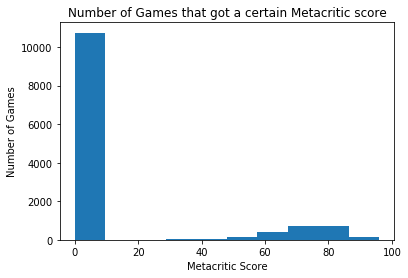

12.458529072006161


In [49]:
plt.xlabel('Metacritic Score')
plt.ylabel('Number of Games')
plt.title('Number of Games that got a certain Metacritic score')
y=df.loc[df.GenreIsNonGame==False,'Metacritic']
counts, bins = np.histogram(y)

plt.hist(bins[:-1], bins, weights=counts)
plt.show()
print(st.mean(df.loc[df.GenreIsNonGame==False,'Metacritic']))

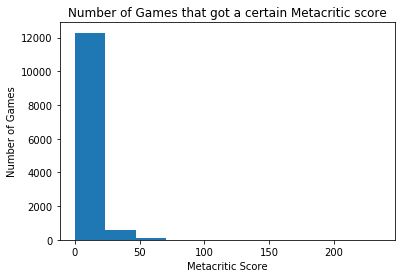

8.4501956103196


In [50]:
plt.xlabel('Metacritic Score')
plt.ylabel('Number of Games')
plt.title('Number of Games that got a certain Metacritic score')
y=df.loc[df.GenreIsNonGame==False,'PriceInitial']
counts, bins = np.histogram(y)

plt.hist(bins[:-1], bins, weights=counts)
plt.show()
print(st.mean(df.loc[df.GenreIsNonGame==False,'PriceInitial']))

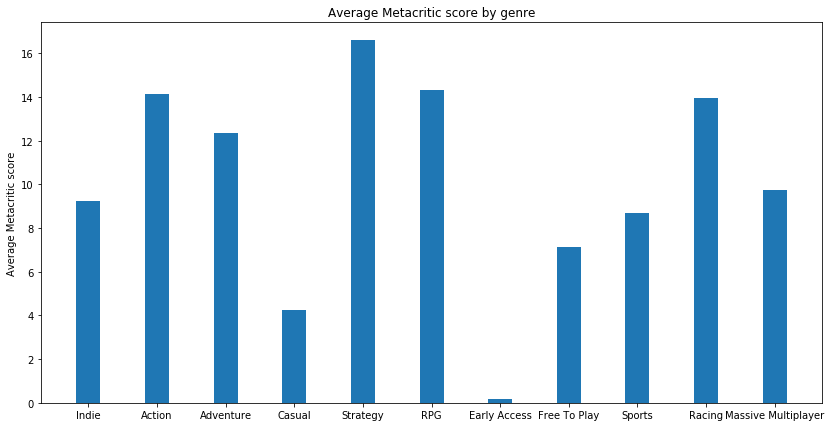

16.588055130168453
0.1598639455782313


In [15]:
indie=st.mean(df.loc[df.GenreIsIndie,'Metacritic'])
action=st.mean(df.loc[df.GenreIsAction,'Metacritic'])
adventure=st.mean(df.loc[df.GenreIsAdventure,'Metacritic'])
casual=st.mean(df.loc[df.GenreIsCasual,'Metacritic'])
strategy=st.mean(df.loc[df.GenreIsStrategy,'Metacritic'])
rpg=st.mean(df.loc[df.GenreIsRPG,'Metacritic'])
early_access=st.mean(df.loc[df.GenreIsEarlyAccess,'Metacritic'])
free_to_play=st.mean(df.loc[df.GenreIsFreeToPlay,'Metacritic'])
sports=st.mean(df.loc[df.GenreIsSports,'Metacritic'])
racing=st.mean(df.loc[df.GenreIsRacing,'Metacritic'])
massive_multi=st.mean(df.loc[df.GenreIsMassivelyMultiplayer,'Metacritic'])

                        

labels = ['Indie', 'Action', 'Adventure', 'Casual','Strategy','RPG','Early Access','Free To Play','Sports','Racing','Massive Multiplayer']
values = [indie, action, adventure, casual,strategy,rpg,early_access,free_to_play,sports,racing,massive_multi]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_ylabel('Average Metacritic score')
ax.set_title('Average Metacritic score by genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()
print(st.mean(df.loc[df.GenreIsStrategy,'Metacritic']))
print(st.mean(df.loc[df.GenreIsEarlyAccess,'Metacritic']))

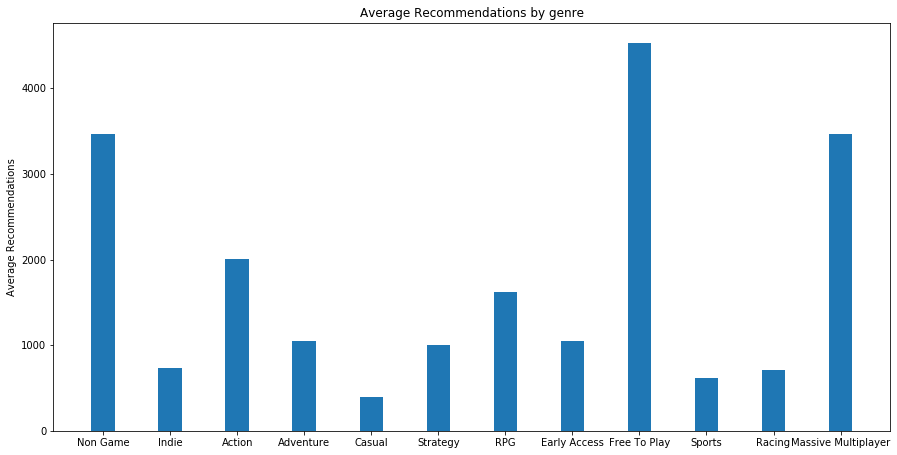

In [114]:
indie=st.mean(df.loc[df.GenreIsIndie,'RecommendationCount'])
action=st.mean(df.loc[df.GenreIsAction,'RecommendationCount'])
adventure=st.mean(df.loc[df.GenreIsAdventure,'RecommendationCount'])
casual=st.mean(df.loc[df.GenreIsCasual,'RecommendationCount'])
strategy=st.mean(df.loc[df.GenreIsStrategy,'RecommendationCount'])
rpg=st.mean(df.loc[df.GenreIsRPG,'RecommendationCount'])
early_access=st.mean(df.loc[df.GenreIsEarlyAccess,'RecommendationCount'])
free_to_play=st.mean(df.loc[df.GenreIsFreeToPlay,'RecommendationCount'])
sports=st.mean(df.loc[df.GenreIsSports,'RecommendationCount'])
racing=st.mean(df.loc[df.GenreIsRacing,'RecommendationCount'])
massive_multi=st.mean(df.loc[df.GenreIsMassivelyMultiplayer,'RecommendationCount'])
non_game=st.mean(df.loc[df.GenreIsMassivelyMultiplayer,'RecommendationCount'])
                        

labels = ['Non Game','Indie', 'Action', 'Adventure', 'Casual','Strategy','RPG','Early Access','Free To Play','Sports','Racing','Massive Multiplayer']
values = [non_game,indie, action, adventure, casual,strategy,rpg,early_access,free_to_play,sports,racing,massive_multi]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7.5))

ax.set_ylabel('Average Recommendations')
ax.set_title('Average Recommendations by genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

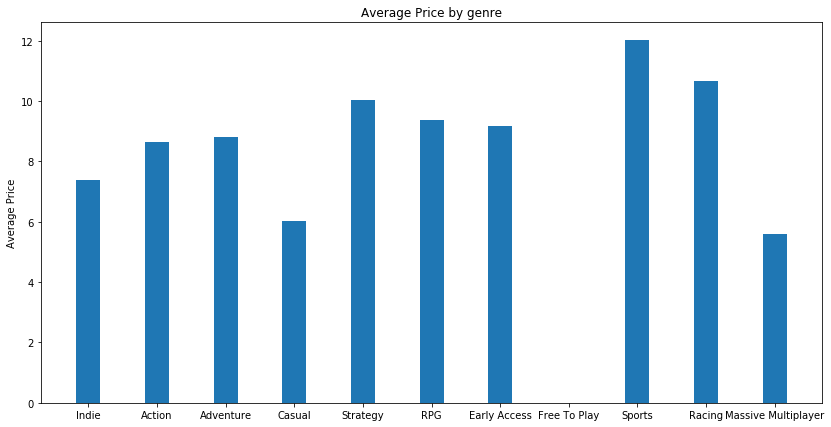

In [115]:
indie=st.mean(df.loc[df.GenreIsIndie,'PriceInitial'])
action=st.mean(df.loc[df.GenreIsAction,'PriceInitial'])
adventure=st.mean(df.loc[df.GenreIsAdventure,'PriceInitial'])
casual=st.mean(df.loc[df.GenreIsCasual,'PriceInitial'])
strategy=st.mean(df.loc[df.GenreIsStrategy,'PriceInitial'])
rpg=st.mean(df.loc[df.GenreIsRPG,'PriceInitial'])
early_access=st.mean(df.loc[df.GenreIsEarlyAccess,'PriceInitial'])
free_to_play=st.mean(df.loc[df.GenreIsFreeToPlay,'PriceInitial'])
sports=st.mean(df.loc[df.GenreIsSports,'PriceInitial'])
racing=st.mean(df.loc[df.GenreIsRacing,'PriceInitial'])
massive_multi=st.mean(df.loc[df.GenreIsMassivelyMultiplayer,'PriceInitial'])

                        

labels = ['Indie', 'Action', 'Adventure', 'Casual','Strategy','RPG','Early Access','Free To Play','Sports','Racing','Massive Multiplayer']
values = [indie, action, adventure, casual,strategy,rpg,early_access,free_to_play,sports,racing,massive_multi]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_ylabel('Average Price')
ax.set_title('Average Price by genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

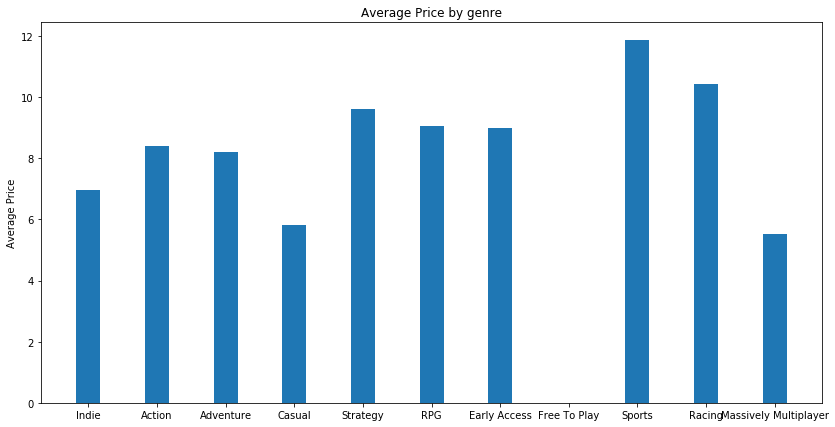

Series([], Name: PriceFinal, dtype: float64)

In [126]:
indie=st.mean(df.loc[df.GenreIsIndie,'PriceFinal'])
action=st.mean(df.loc[df.GenreIsAction,'PriceFinal'])
adventure=st.mean(df.loc[df.GenreIsAdventure,'PriceFinal'])
casual=st.mean(df.loc[df.GenreIsCasual,'PriceFinal'])
strategy=st.mean(df.loc[df.GenreIsStrategy,'PriceFinal'])
rpg=st.mean(df.loc[df.GenreIsRPG,'PriceFinal'])
early_access=st.mean(df.loc[df.GenreIsEarlyAccess,'PriceFinal'])
free_to_play=st.mean(df.loc[df.GenreIsFreeToPlay,'PriceFinal'])
sports=st.mean(df.loc[df.GenreIsSports,'PriceFinal'])
racing=st.mean(df.loc[df.GenreIsRacing,'PriceFinal'])
massive_multi=st.mean(df.loc[df.GenreIsMassivelyMultiplayer,'PriceFinal'])

                        

labels = ['Indie', 'Action', 'Adventure', 'Casual','Strategy','RPG','Early Access','Free To Play','Sports','Racing','Massively Multiplayer']
values = [indie, action, adventure, casual,strategy,rpg,early_access,free_to_play,sports,racing,massive_multi]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_ylabel('Average Price')
ax.set_title('Average Price by genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

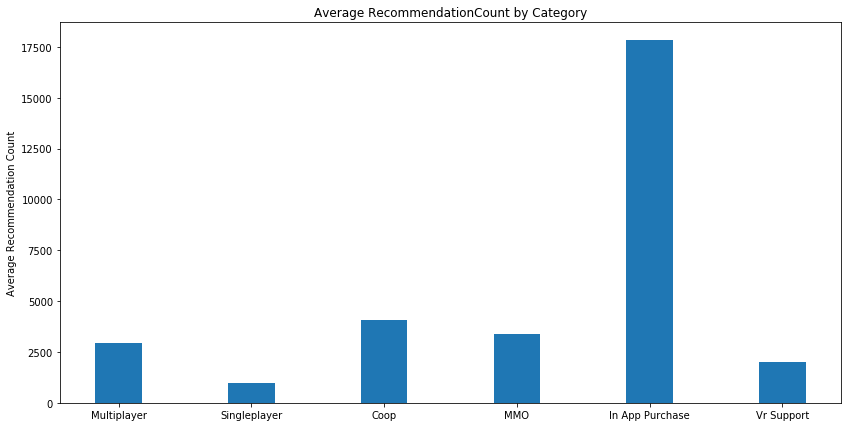

In [18]:
mp=st.mean(df.loc[df.CategoryMultiplayer==True,'RecommendationCount'])
sp=st.mean(df.loc[df.CategorySinglePlayer==True,'RecommendationCount'])
coop=st.mean(df.loc[df.CategoryCoop ==True,'RecommendationCount'])
mmo=st.mean(df.loc[df.CategoryMMO ==True,'RecommendationCount'])
inap=st.mean(df.loc[df.CategoryInAppPurchase  ==True,'RecommendationCount'])
vr=st.mean(df.loc[df.CategoryVRSupport==True,'RecommendationCount'])

labels = ['Multiplayer', 'Singleplayer','Coop','MMO','In App Purchase','Vr Support']
values = [mp, sp,coop,mmo,inap,vr]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_ylabel('Average Recommendation Count')
ax.set_title('Average RecommendationCount by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

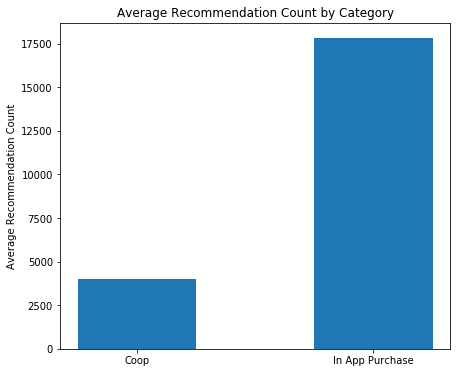

3999.332830188679
17817.462427745664


In [76]:
coop=st.mean(df.loc[df.CategoryCoop ==True,'RecommendationCount'])
inap=st.mean(df.loc[df.CategoryInAppPurchase  ==True,'RecommendationCount'])


labels = ['Coop','In App Purchase']
values = [coop,inap]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 6))

ax.set_ylabel('Average Recommendation Count')
ax.set_title('Average Recommendation Count by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()
print(st.mean(df.loc[df.CategoryCoop ==True,'RecommendationCount']))
print(st.mean(df.loc[df.CategoryInAppPurchase  ==True,'RecommendationCount']))

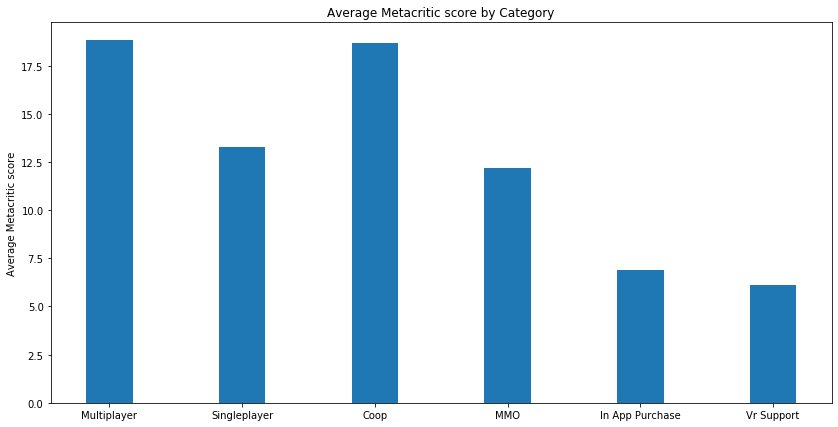

In [38]:
mp=st.mean(df.loc[df.CategoryMultiplayer==True,'Metacritic'])
sp=st.mean(df.loc[df.CategorySinglePlayer==True,'Metacritic'])
coop=st.mean(df.loc[df.CategoryCoop ==True,'Metacritic'])
mmo=st.mean(df.loc[df.CategoryMMO ==True,'Metacritic'])
inap=st.mean(df.loc[df.CategoryInAppPurchase  ==True,'Metacritic'])
vr=st.mean(df.loc[df.CategoryVRSupport==True,'Metacritic'])

labels = ['Multiplayer', 'Singleplayer','Coop','MMO','In App Purchase','Vr Support']
values = [mp, sp,coop,mmo,inap,vr]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_ylabel('Average Metacritic score')
ax.set_title('Average Metacritic score by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

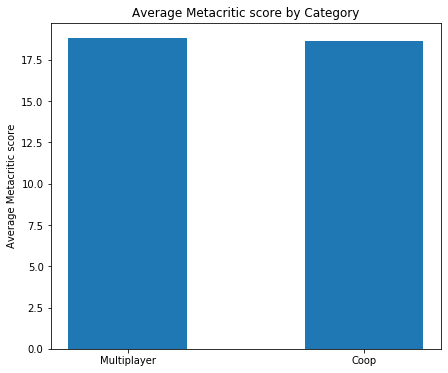

In [17]:
coop=st.mean(df.loc[df.CategoryCoop ==True,'Metacritic'])
multi=st.mean(df.loc[df.CategoryMultiplayer  ==True,'Metacritic'])


labels = ['Multiplayer','Coop']
values = [multi,coop]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 6))

ax.set_ylabel('Average Metacritic score')
ax.set_title('Average Metacritic score by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

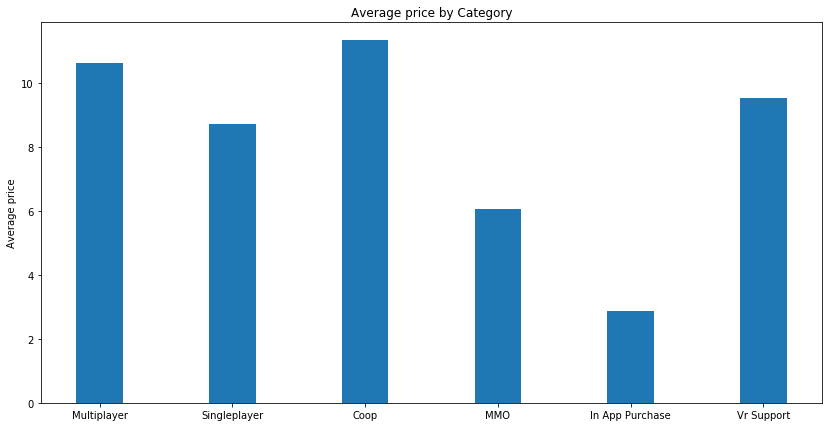

In [45]:
mp=st.mean(df.loc[df.CategoryMultiplayer==True,'PriceFinal'])
sp=st.mean(df.loc[df.CategorySinglePlayer==True,'PriceFinal'])
coop=st.mean(df.loc[df.CategoryCoop ==True,'PriceFinal'])
mmo=st.mean(df.loc[df.CategoryMMO ==True,'PriceFinal'])
inap=st.mean(df.loc[df.CategoryInAppPurchase  ==True,'PriceFinal'])
vr=st.mean(df.loc[df.CategoryVRSupport==True,'PriceFinal'])

labels = ['Multiplayer', 'Singleplayer','Coop','MMO','In App Purchase','Vr Support']
values = [mp, sp,coop,mmo,inap,vr]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 7))

ax.set_ylabel('Average price')
ax.set_title('Average price by Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

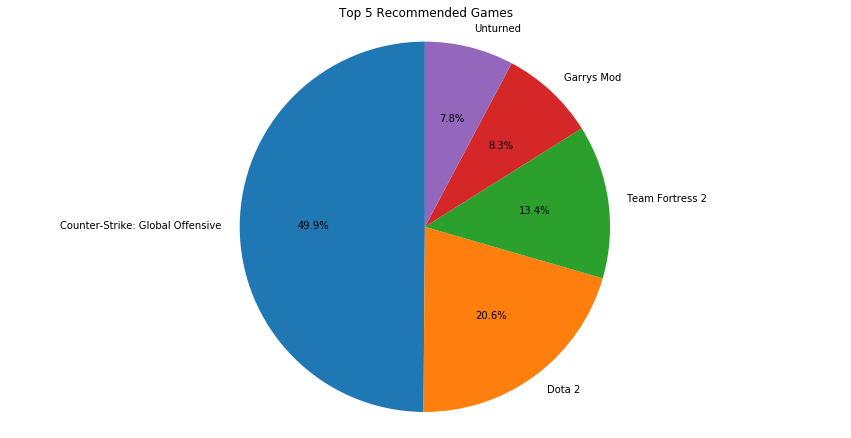

In [119]:
top=df.sort_values(by='RecommendationCount',ascending=False).head(5)
values=top['RecommendationCount']
labels = top['ResponseName']


fig1, ax1 = plt.subplots(figsize=(15, 7.5))
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.set_title('Top 5 Recommended Games')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

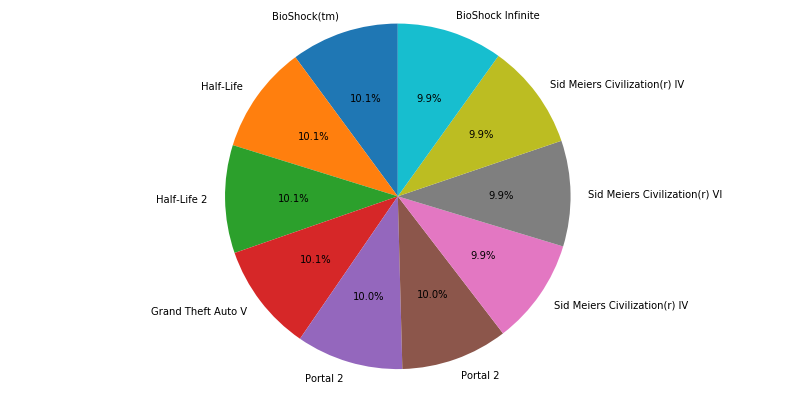

In [65]:
top=df.sort_values(by='Metacritic',ascending=False).head(10)
values=top['Metacritic']
labels = top['ResponseName']


fig1, ax1 = plt.subplots(figsize=(14, 7))
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

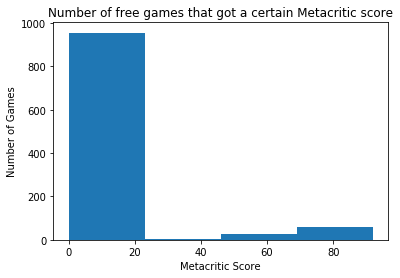

In [10]:
plt.xlabel('Metacritic Score')
plt.ylabel('Number of Games')
plt.title('Number of free games that got a certain Metacritic score')
x = df.loc[df.IsFree==True, 'Metacritic']

plt.hist(x,bins=4)
plt.show()

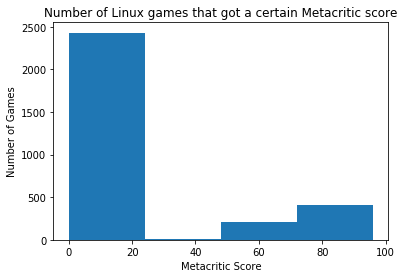

In [12]:
plt.xlabel('Metacritic Score')
plt.ylabel('Number of Games')
plt.title('Number of Linux games that got a certain Metacritic score')
x = df.loc[df.PlatformLinux==True, 'Metacritic']

plt.hist(x,bins=4)
plt.show()

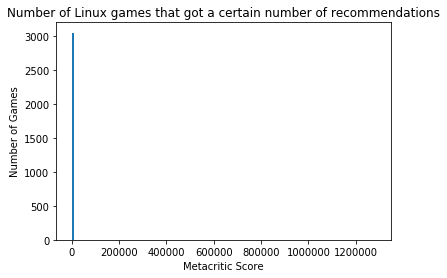

In [66]:
plt.xlabel('Metacritic Score')
plt.ylabel('Number of Games')
plt.title('Number of Linux games that got a certain number of recommendations')
y = df.loc[df.PlatformLinux==True, 'RecommendationCount']

counts, bins = np.histogram(y)
plt.hist(bins[:-1], 140, weights=counts)
plt.show()

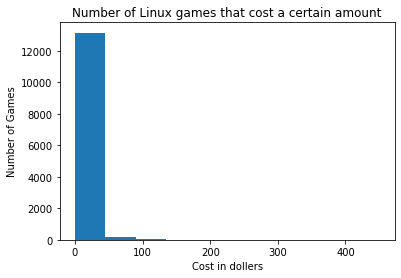

In [41]:
plt.xlabel('Cost in dollers')
plt.ylabel('Number of Games')
plt.title('Number of games that cost a certain amount')

counts, bins = np.histogram(df.PriceFinal)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

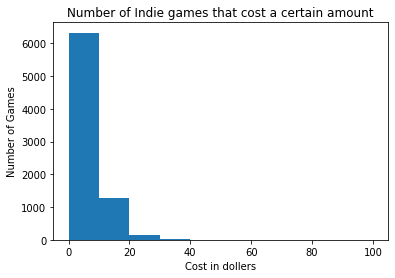

In [43]:
plt.xlabel('Cost in dollers')
plt.ylabel('Number of Games')
plt.title('Number of Indie games that cost a certain amount')

y = df.loc[df.GenreIsIndie==True, 'PriceFinal']
counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

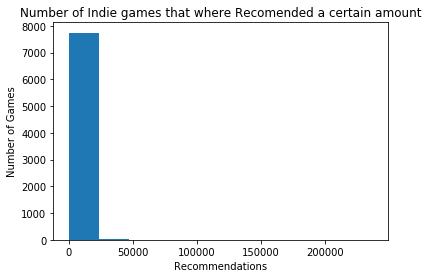

In [51]:
plt.xlabel('Recommendations')
plt.ylabel('Number of Games')
plt.title('Number of Indie games that where Recomended a certain amount')

y = df.loc[df.GenreIsIndie==True, 'RecommendationCount']
counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

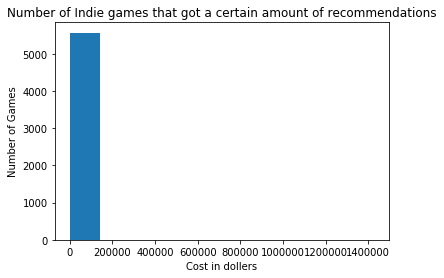

In [49]:
plt.xlabel('Cost in dollers')
plt.ylabel('Number of Games')
plt.title('Number of Non-Indie games that got a certain amount of recommendations')

y = df.loc[df.GenreIsIndie==False, 'RecommendationCount']
counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

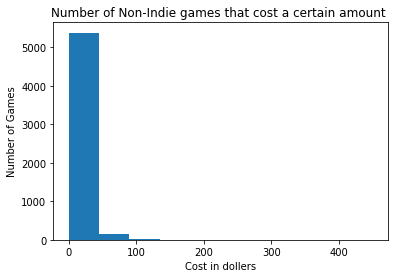

In [52]:
plt.xlabel('Cost in dollers')
plt.ylabel('Number of Games')
plt.title('Number of Non-Indie games that cost a certain amount ')

y = df.loc[df.GenreIsIndie==False, 'PriceFinal']
counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

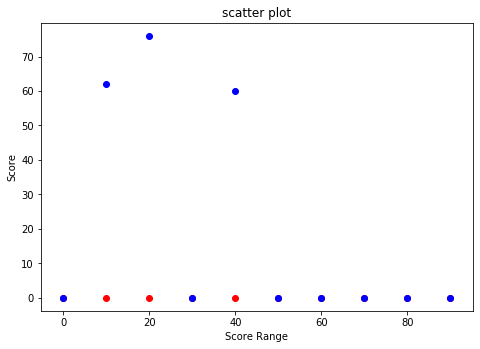

In [75]:
Free_Games = df.loc[df.IsFree==True, 'Metacritic'].sample(n=10, random_state=124123)
Non_Free_Games = df.loc[df.IsFree==False, 'Metacritic'].sample(n=10, random_state=42194)
Score_range = [np.arange(0,100,10)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Free_Games, color='r')
ax.scatter(Score_range, Non_Free_Games, color='b')
ax.set_xlabel('Score Range')
ax.set_ylabel('Score')
ax.set_title('scatter plot')
plt.show()

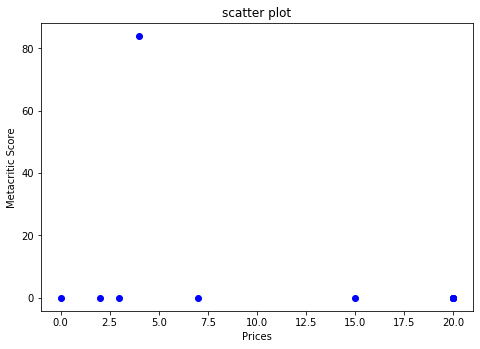

In [66]:
dfNonFree = df.loc[(df.IsFree==False) & (df.GenreIsNonGame==False)].sample(n=10, random_state=70)
FreeGames=dfNonFree['Metacritic']
Score_range = dfNonFree['PriceFinal']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Non_Free_Games, color='b')
ax.set_xlabel('Prices')
ax.set_ylabel('Metacritic Score')
ax.set_title('scatter plot')
plt.show()

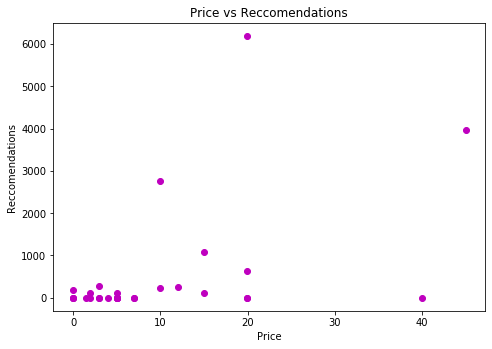

In [130]:
dfNonFree = df.loc[df.IsFree==False].sample(n=30, random_state=9)
Games=dfNonFree['RecommendationCount']
Score_range = dfNonFree['PriceFinal']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Games, color='m')
ax.set_xlabel('Price')
ax.set_ylabel('Reccomendations')
ax.set_title('Price vs Reccomendations')
plt.show()

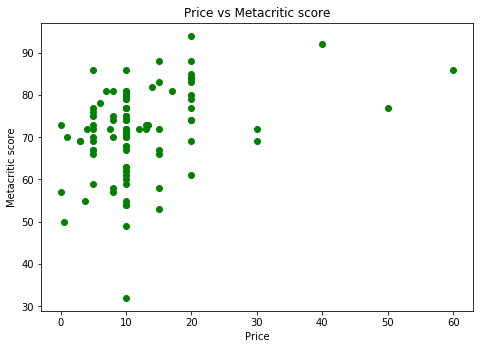

In [115]:
dfNonFree = df.loc[(df.IsFree==False) &(df.Metacritic>0) ].sample(n=100, random_state=709)
Games=dfNonFree['Metacritic']
Score_range = dfNonFree['PriceFinal']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Games, color='g')
ax.set_xlabel('Price')
ax.set_ylabel('Metacritic score')
ax.set_title('Price vs Metacritic score')
plt.show()

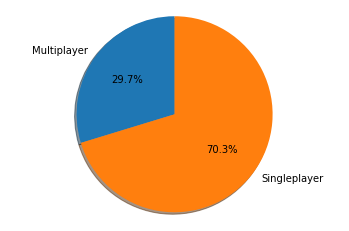

In [70]:
mp=sum(df.loc[df.CategoryMultiplayer==True,'Metacritic'])
sp=sum(df.loc[df.CategorySinglePlayer==True,'Metacritic'])
labels = 'Multiplayer', 'Singleplayer'
sizes = [mp, sp]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

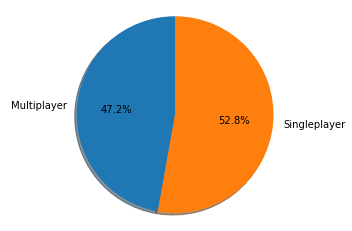

In [71]:
mp=sum(df.loc[df.CategoryMultiplayer==True,'RecommendationCount'])
sp=sum(df.loc[df.CategorySinglePlayer==True,'RecommendationCount'])
labels = 'Multiplayer', 'Singleplayer'
sizes = [mp, sp]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

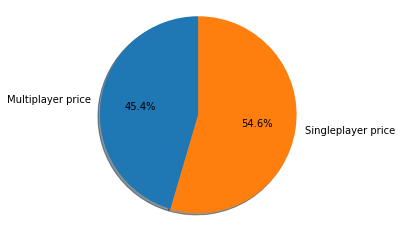

In [15]:
spprice=st.mean(df.loc[df.CategoryMultiplayer==True,'PriceInitial'])
mpprice=st.mean(df.loc[df.CategorySinglePlayer==True,'PriceInitial'])
labels = 'Multiplayer price', 'Singleplayer price'
sizes = [mpprice, spprice]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


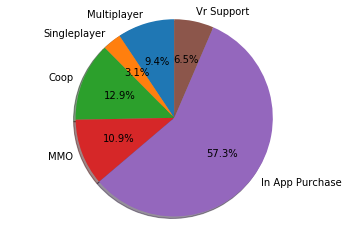

In [16]:
mp=st.mean(df.loc[df.CategoryMultiplayer==True,'RecommendationCount'])
sp=st.mean(df.loc[df.CategorySinglePlayer==True,'RecommendationCount'])
coop=st.mean(df.loc[df.CategoryCoop ==True,'RecommendationCount'])
mmo=st.mean(df.loc[df.CategoryMMO ==True,'RecommendationCount'])
inap=st.mean(df.loc[df.CategoryInAppPurchase  ==True,'RecommendationCount'])
vr=st.mean(df.loc[df.CategoryVRSupport==True,'RecommendationCount'])
labels = 'Multiplayer', 'Singleplayer','Coop','MMO','In App Purchase','Vr Support'
sizes = [mp, sp,coop,mmo,inap,vr]
explode = (0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

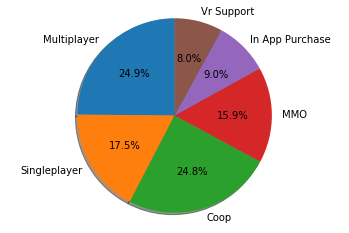

In [78]:
mp=st.mean(df.loc[df.CategoryMultiplayer==True,'Metacritic'])
sp=st.mean(df.loc[df.CategorySinglePlayer==True,'Metacritic'])
coop=st.mean(df.loc[df.CategoryCoop ==True,'Metacritic'])
mmo=st.mean(df.loc[df.CategoryMMO ==True,'Metacritic'])
inap=st.mean(df.loc[df.CategoryInAppPurchase  ==True,'Metacritic'])
vr=st.mean(df.loc[df.CategoryVRSupport==True,'Metacritic'])
labels = 'Multiplayer', 'Singleplayer','Coop','MMO','In App Purchase','Vr Support'
sizes = [mp, sp,coop,mmo,inap,vr]
explode = (0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

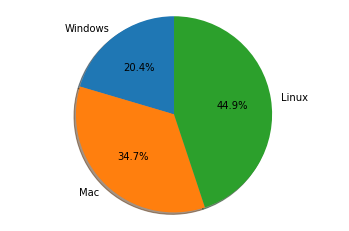

In [80]:
win=st.mean(df.loc[df.PlatformWindows==True,'RecommendationCount'])
mac=st.mean(df.loc[df.PlatformMac==True,'RecommendationCount'])
lin=st.mean(df.loc[df.PlatformLinux==True,'RecommendationCount'])

labels = 'Windows','Mac','Linux'
sizes = [win,mac,lin]
explode = (0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

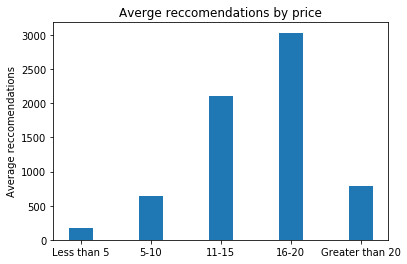

In [118]:
five=st.mean(df.loc[(df.PriceFinal < 5) & (df.IsFree==False),'RecommendationCount'])
ten=st.mean(df.loc[(df.PriceFinal <= 10) & (df.PriceInitial >= 5) & (df.IsFree==False),'RecommendationCount'])
fifthteen=st.mean(df.loc[(df.PriceFinal <= 15) & (df.PriceInitial > 10) & (df.IsFree==False),'RecommendationCount'])
twenty=st.mean(df.loc[(df.PriceFinal <= 20) & (df.PriceInitial > 15) & (df.IsFree==False),'RecommendationCount'])
twentyplus=st.mean(df.loc[(df.PriceFinal < 20) & (df.IsFree==False),'RecommendationCount'])

labels = ['Less than 5', '5-10', '11-15', '16-20', 'Greater than 20']
values = [five, ten, fifthteen, twenty, twentyplus]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Average reccomendations')
ax.set_title('Averge reccomendations by price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()


In [ ]:
twenty=st.mean(df.loc[(df.PriceFinal <= 20) & (df.PriceInitial > 15) & (df.IsFree==False),'RecommendationCount'])
twentyplus=st.mean(df.loc[(df.PriceFinal < 20) & (df.IsFree==False),'RecommendationCount'])

labels = ['Less than 5', '5-10', '11-15', '16-20', 'Greater than 20']
values = [five, ten, fifthteen, twenty, twentyplus]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Average reccomendations')
ax.set_title('Averge reccomendations by price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()


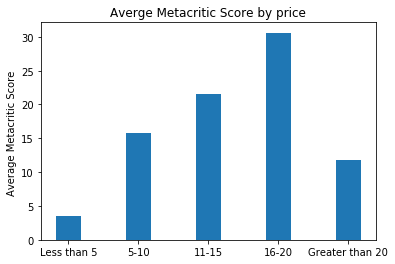

In [22]:
five=st.mean(df.loc[(df.PriceInitial <= 5) & (df.IsFree==False),'Metacritic'])
ten=st.mean(df.loc[(df.PriceInitial <= 10) & (df.PriceInitial > 5) & (df.IsFree==False),'Metacritic'])
fifthteen=st.mean(df.loc[(df.PriceInitial <= 15) & (df.PriceInitial > 10) & (df.IsFree==False),'Metacritic'])
twenty=st.mean(df.loc[(df.PriceInitial <= 20) & (df.PriceInitial > 15) & (df.IsFree==False),'Metacritic'])
twentyplus=st.mean(df.loc[(df.PriceInitial < 20) & (df.IsFree==False),'Metacritic'])

labels = ['Less than 5', '5-10', '11-15', '16-20', 'Greater than 20']
values = [five, ten, fifthteen, twenty, twentyplus]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Average Metacritic Score ')
ax.set_title('Averge Metacritic Score by price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()


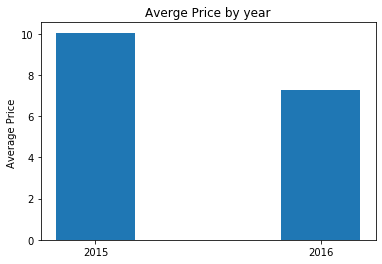

In [372]:
twentyfifth=st.mean(df.loc[df.ReleaseDate==2015,'PriceFinal'])
twentysixith=st.mean(df.loc[df.ReleaseDate==2016,'PriceFinal'])

labels = ['2015', '2016',]
values = [twentyfifth, twentysixith]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Average Price')
ax.set_title('Averge Price by year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

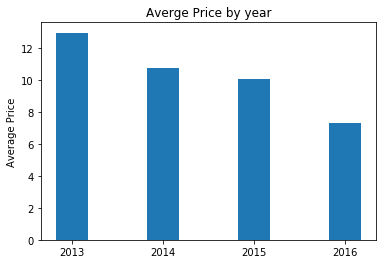

In [375]:
twentythree=st.mean(df.loc[df.ReleaseDate==2013,'PriceFinal'])
twentyfour=st.mean(df.loc[df.ReleaseDate==2014,'PriceFinal'])
twentyfifth=st.mean(df.loc[df.ReleaseDate==2015,'PriceFinal'])
twentysixith=st.mean(df.loc[df.ReleaseDate==2016,'PriceFinal'])

labels = ['2013','2014','2015', '2016',]
values = [twentythree,twentyfour,twentyfifth, twentysixith]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Average Price')
ax.set_title('Averge Price by year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar(x,values,width=width)
plt.show()

In [64]:
df.loc[df.ReleaseDate==2015,'PriceFinal'].sample(n=100, random_state=9)
df.loc[df.ReleaseDate==2016,'PriceFinal'].sample(n=100, random_state=9)

# tCrit is 1.653
# since scipy ind test is a two tailed test p value is divided by 2
t,p2tailed=stats.ttest_ind(value1,value2)
print(t,p2tailed/2)

1.6185950911303215 0.05356310678905935


In [66]:
coop=df.loc[df.CategoryCoop ==True,'Metacritic'].sample(n=100, random_state=9)
multi=df.loc[df.CategoryMultiplayer  ==True,'Metacritic'].sample(n=100, random_state=9)

t,p2tailed=stats.ttest_ind(multi,coop)
print(t,p2tailed/2)

0.02352595101241611 0.4906272152675226


In [72]:
coop=df.loc[df.CategoryCoop ==True,'RecommendationCount'].sample(n=100, random_state=1)
inapp=df.loc[df.CategoryInAppPurchase ==True,'RecommendationCount'].sample(n=100, random_state=1)

t,p2tailed=stats.ttest_ind(inapp,coop)
print(t,p2tailed/2)

1.466141448855674 0.07209804387207264


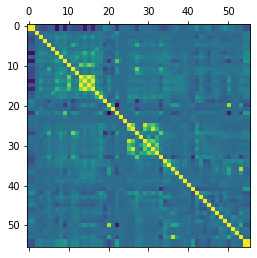

In [77]:
plt.matshow(df.corr())
plt.show()

In [108]:
ndf=df.select_dtypes(exclude ='bool')
ndf=ndf.select_dtypes(exclude ='object')
ndf.dtypes

QueryID                          int64
ResponseID                       int64
ReleaseDate                      int32
RequiredAge                      int64
DemoCount                        int64
DeveloperCount                   int64
DLCCount                         int64
Metacritic                       int64
MovieCount                       int64
PackageCount                     int64
RecommendationCount              int64
PublisherCount                   int64
ScreenshotCount                  int64
SteamSpyOwners                   int64
SteamSpyOwnersVariance           int64
SteamSpyPlayersEstimate          int64
SteamSpyPlayersVariance          int64
AchievementCount                 int64
AchievementHighlightedCount      int64
PriceInitial                   float64
PriceFinal                     float64
dtype: object

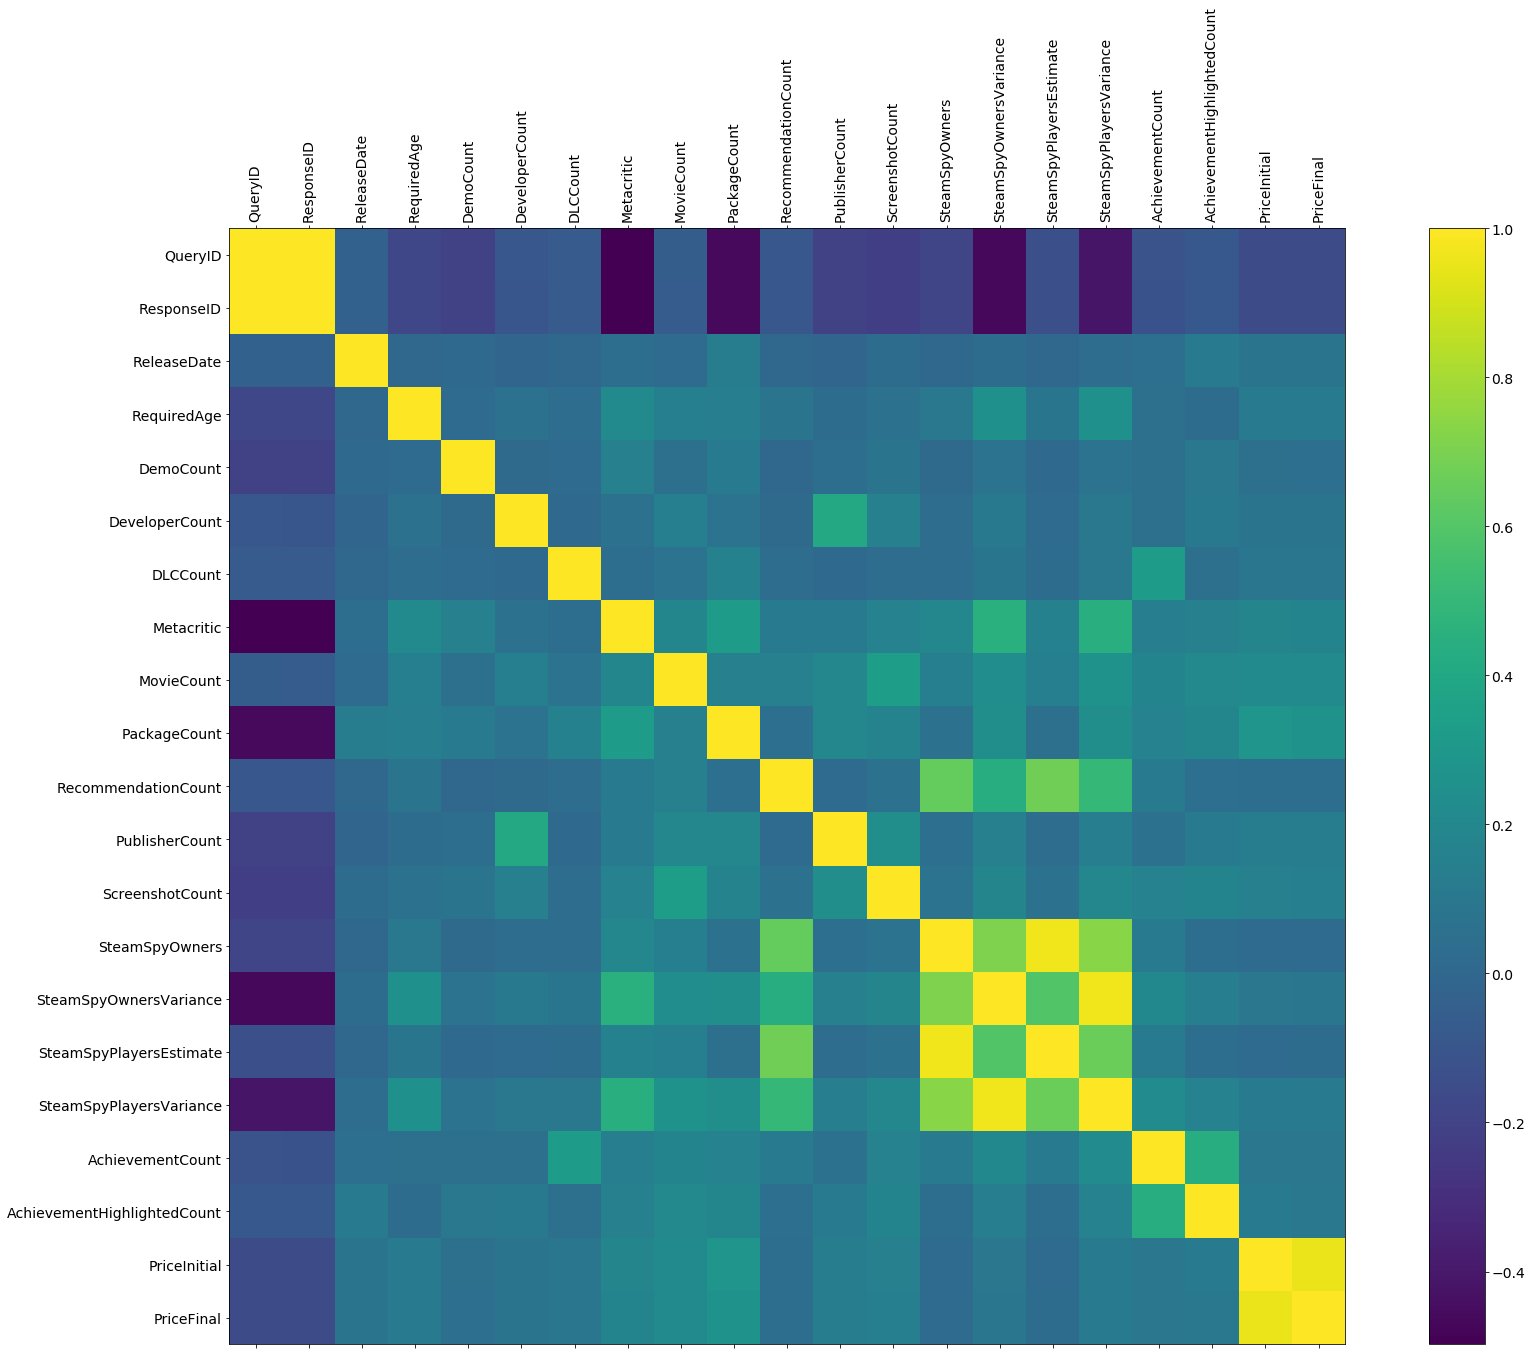

In [111]:

f = plt.figure(figsize=(30, 20))
plt.matshow(ndf.corr(method='pearson'), fignum=f.number)
plt.xticks(range(ndf.shape[1]), ndf.columns, fontsize=14, rotation=90)
plt.yticks(range(ndf.shape[1]), ndf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [ ]:
scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

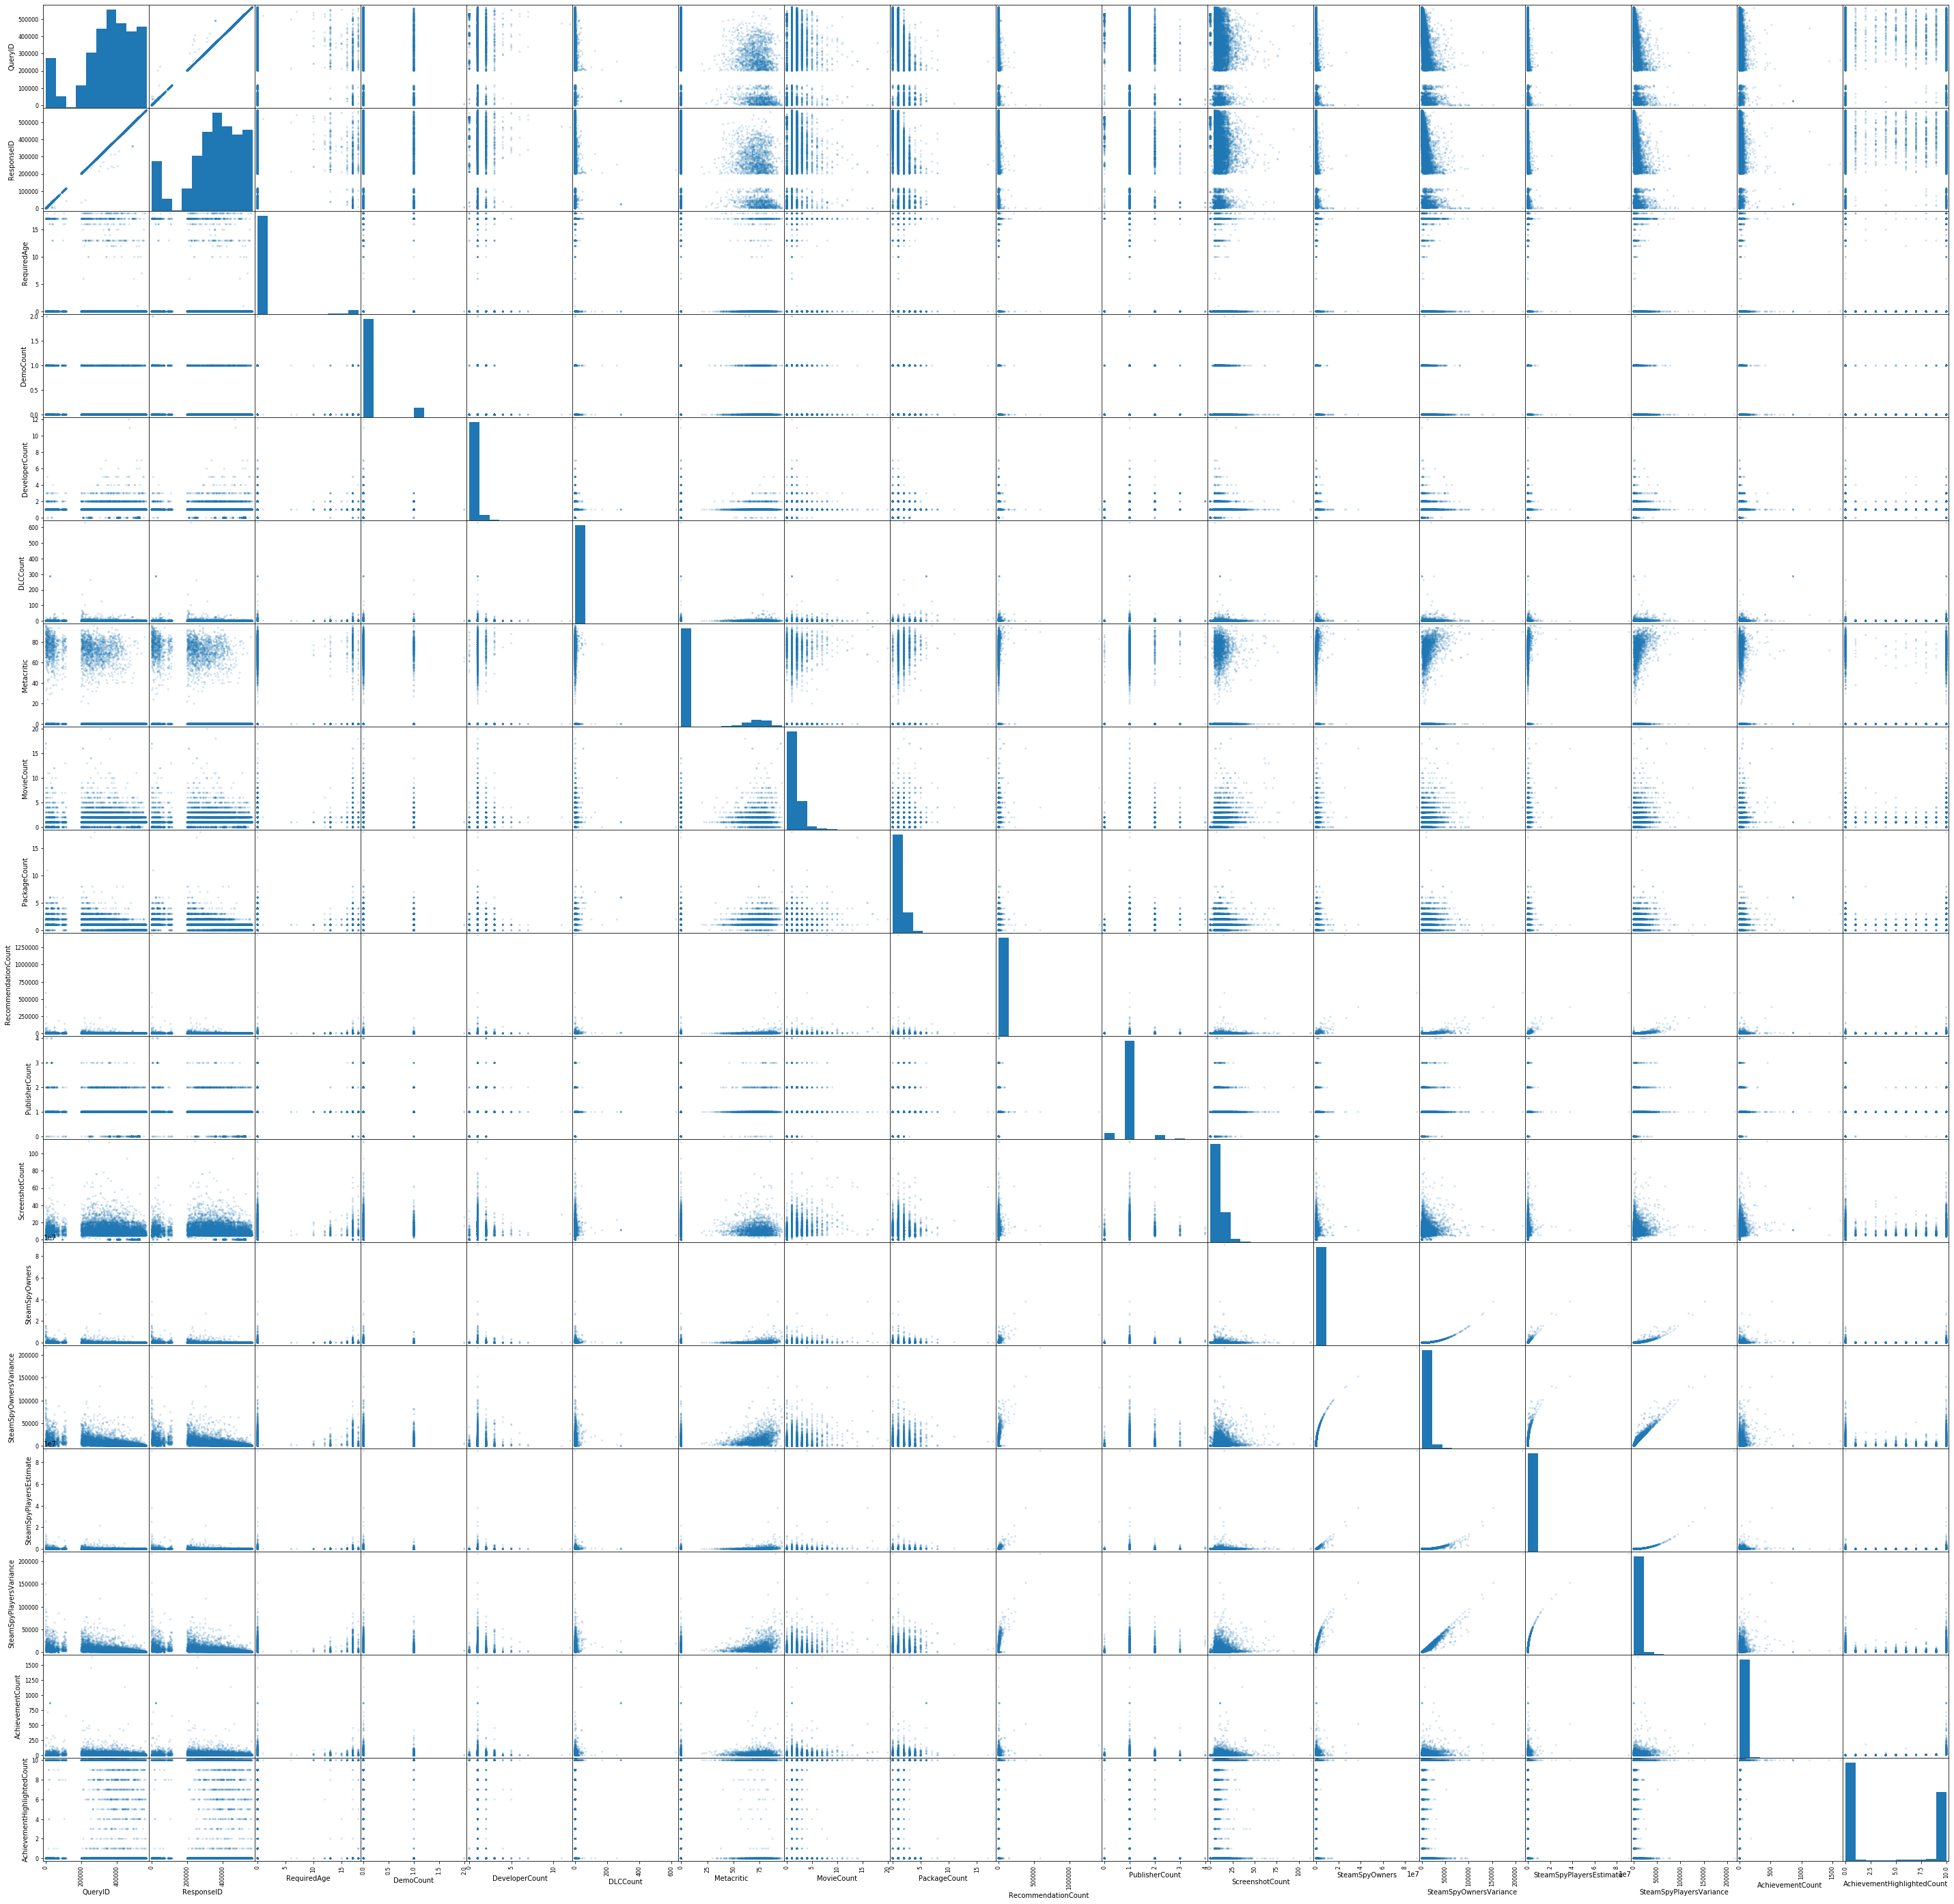

In [103]:
scatter_matrix(df.select_dtypes(include ='int64'),alpha=0.2, figsize=(50, 50))
plt.show()

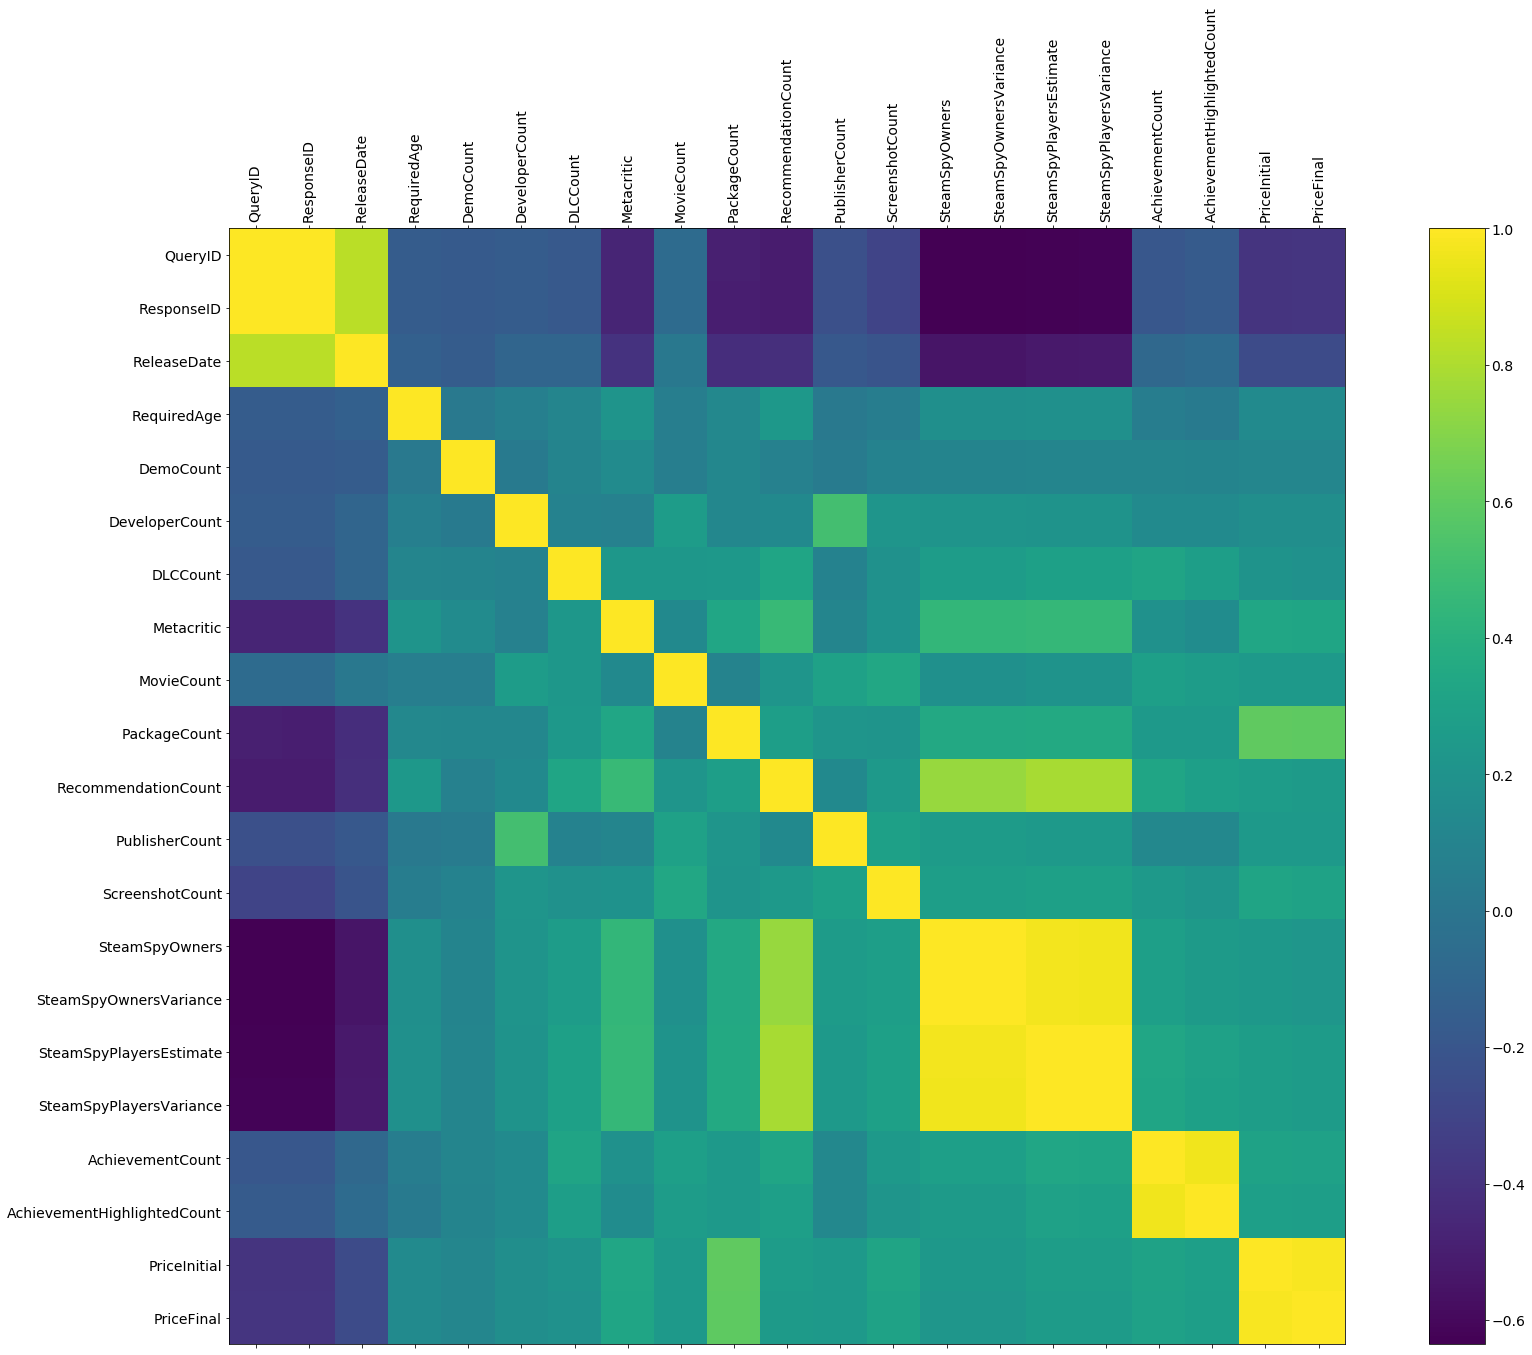

In [112]:
f = plt.figure(figsize=(30, 20))
plt.matshow(ndf.corr(method='spearman'), fignum=f.number)
plt.xticks(range(ndf.shape[1]), ndf.columns, fontsize=14, rotation=90)
plt.yticks(range(ndf.shape[1]), ndf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

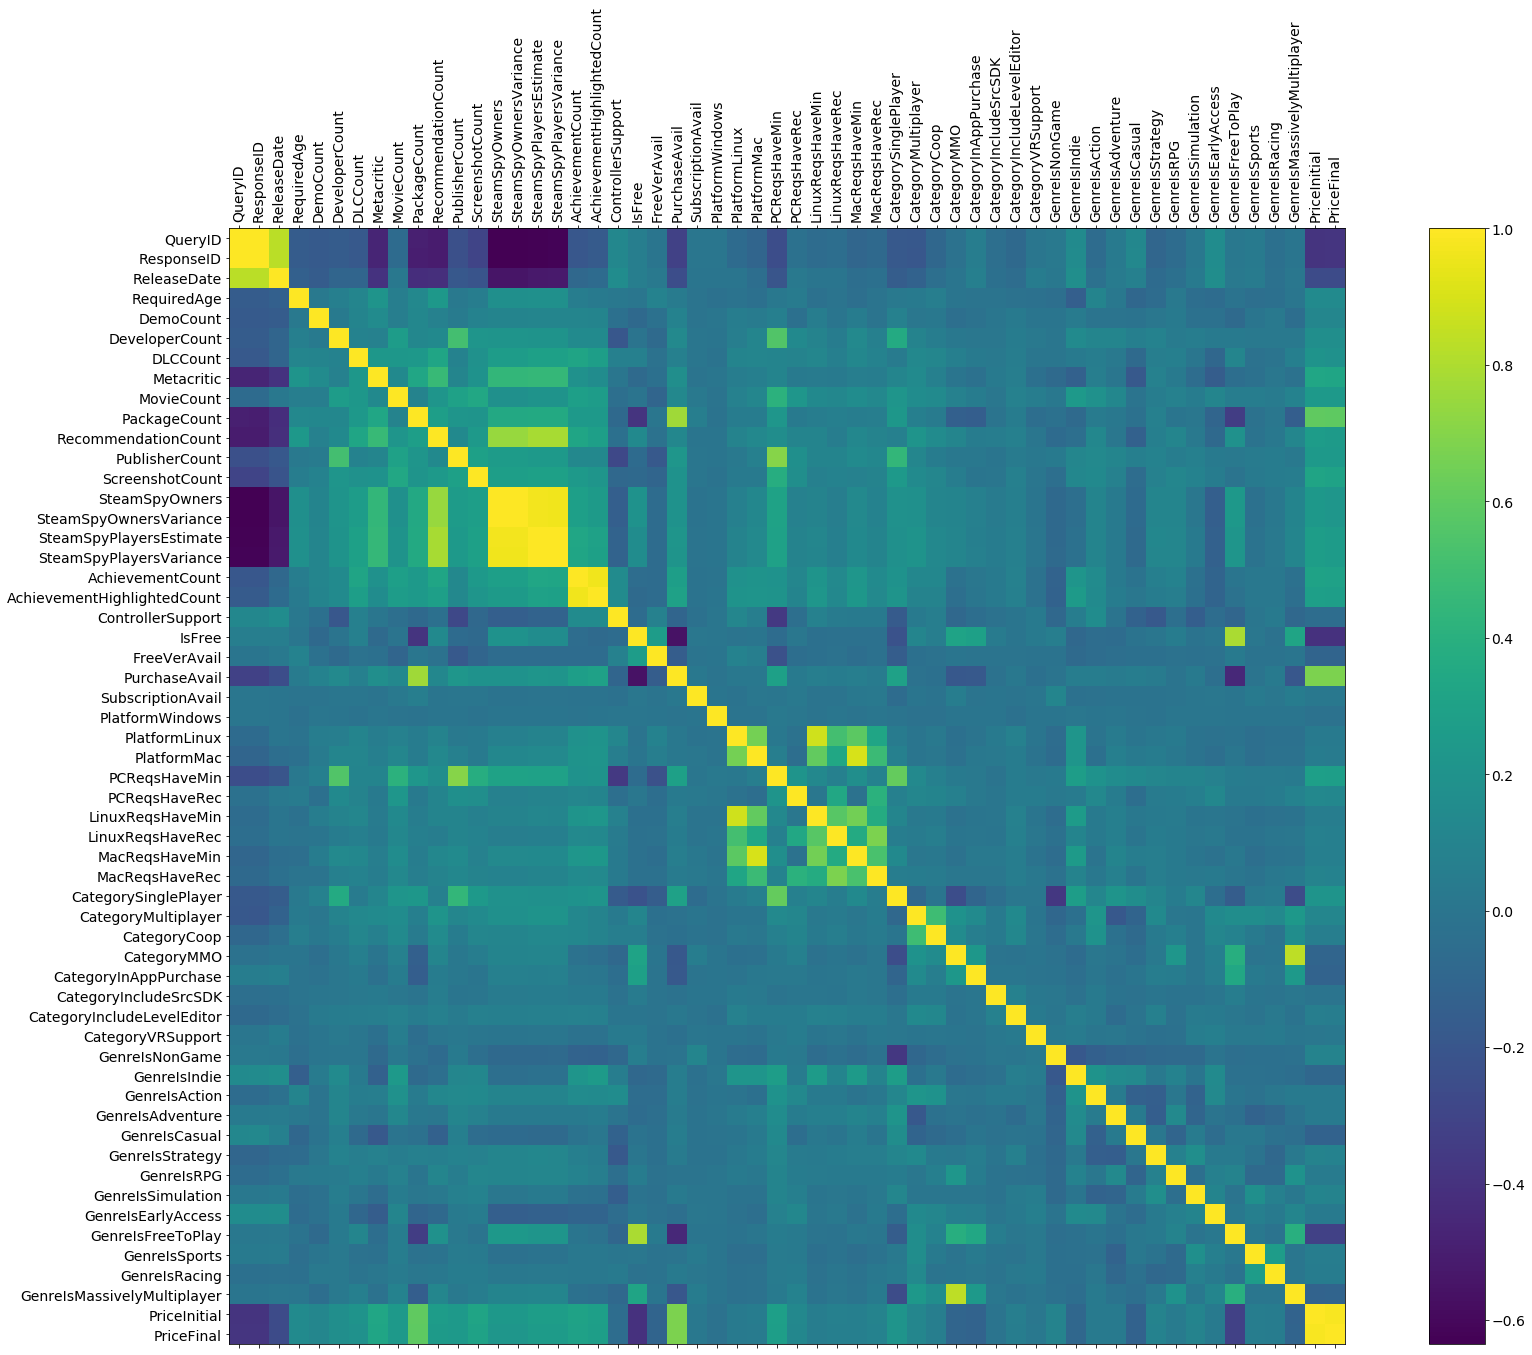

In [116]:
df2=df.select_dtypes(exclude ='object')
f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(method='spearman'), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=90)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

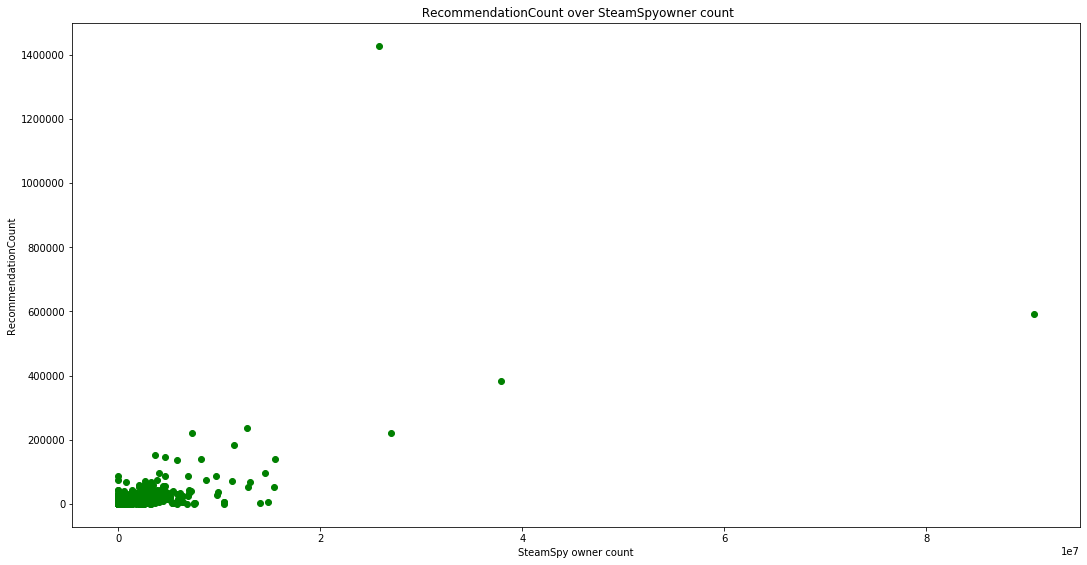

(0.6435988422112349, 0.0)
SpearmanrResult(correlation=0.7501654776303415, pvalue=0.0)


In [144]:
Games=df['RecommendationCount']
Score_range = df['SteamSpyOwners']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Games, color='g')
ax.set_xlabel('SteamSpy owner count')
ax.set_ylabel('RecommendationCount')
ax.set_title(' RecommendationCount over SteamSpyowner count')
plt.show()
print(stats.pearsonr(Games, Score_range))
print(stats.spearmanr(Games, Score_range))

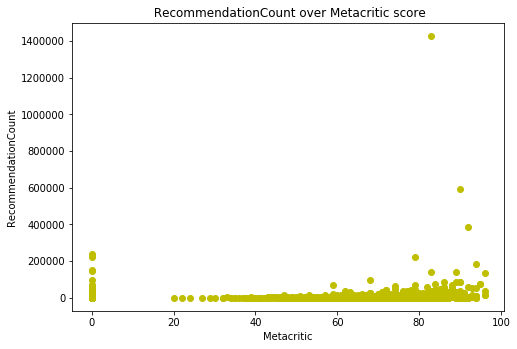

(0.1181198621668242, 1.515176585388193e-42)
SpearmanrResult(correlation=0.4657167962074023, pvalue=0.0)


In [133]:
Games=df['RecommendationCount']
Score_range = df['Metacritic']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Games, color='y')
ax.set_xlabel('Metacritic')
ax.set_ylabel('RecommendationCount')
ax.set_title(' RecommendationCount over Metacritic score')
plt.show()
print(stats.pearsonr(Games, Score_range))
print(stats.spearmanr(Games, Score_range))

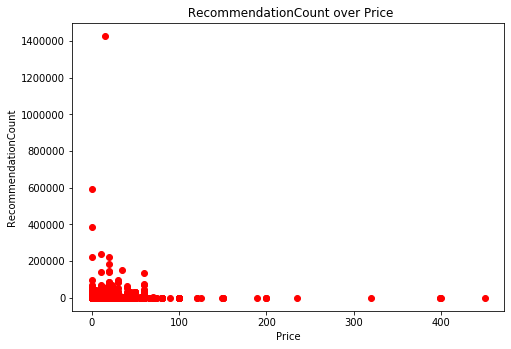

(0.04378413637521766, 4.368864892451628e-07)
SpearmanrResult(correlation=0.2568203456038146, pvalue=2.1922728270310777e-199)


In [135]:
Games=df['RecommendationCount']
Score_range = df['PriceFinal']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Score_range, Games, color='r')
ax.set_xlabel('Price')
ax.set_ylabel('RecommendationCount')
ax.set_title(' RecommendationCount over Price')
plt.show()
print(stats.pearsonr(Games, Score_range))
print(stats.spearmanr(Games, Score_range))

In [148]:
x = np.array(df['RecommendationCount'])
y = np.array(df['SteamSpyOwners'])
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
prediction = intercept + slope * 1000000
print(prediction)

47609086.51104292
